In [4]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
df = pd.read_excel('./file_RNAseq/RNAseq_result.xlsx')

In [5]:
df.head()

,target_id,WT1,WT2,WT3,Treat1,Treat2,Treat3,Treat4,Treat5,Treat6
0,ENSMUST00000177564.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ENSMUST00000196221.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENSMUST00000179664.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENSMUST00000178537.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ENSMUST00000178862.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
matrix = df.values[:,1:]

In [13]:
zscore = scale(matrix,axis=1) # nan 값을 알아서 보정해준다. 완전편리.  

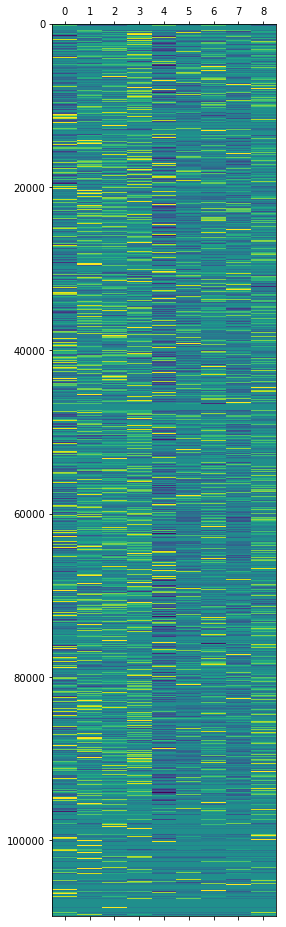

In [14]:
plt.matshow(zscore,aspect='auto')

In [44]:
# fold_change 가 안되는 컴이 있으니 difference 로 바꾸자. 

wt_mean    = np.mean(zscore[:,0:3],axis=1)
wt_std     = np.std(zscore[:,0:3],axis=1)
treat_mean = np.mean(zscore[:,3:9],axis=1)
treat_std  = np.std(zscore[:,3:9],axis=1)

diff       = wt_mean - treat_mean

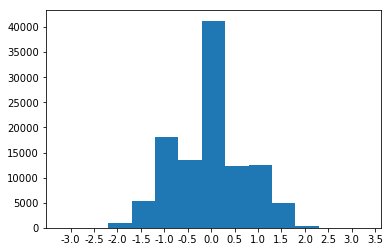

In [35]:
# diff 의 분포를 보자 
plt.hist(diff,bins=np.arange(-3,4,0.5))
plt.xticks(np.arange(-3,4,0.5)+0.2,np.arange(-3,4,0.5))
plt.show()

In [28]:
np.arange(-2,2,1)

array([-2, -1,  0,  1])

In [106]:
stable_expression    = (wt_std < 0.5) & (treat_std < 0.5)
wt_higher_than_treat = diff > 0
treat_higher_than_wt = diff < 0

In [107]:
set1 = stable_expression & wt_higher_than_treat
set2 = stable_expression & treat_higher_than_wt
set3 = ~set1 & ~set2

In [108]:
set1_true_index = list(set1.nonzero()[0])
set2_true_index = list(set2.nonzero()[0])
set3_true_index = list(set3.nonzero()[0])

In [109]:
set_all = set1_true_index + set2_true_index 

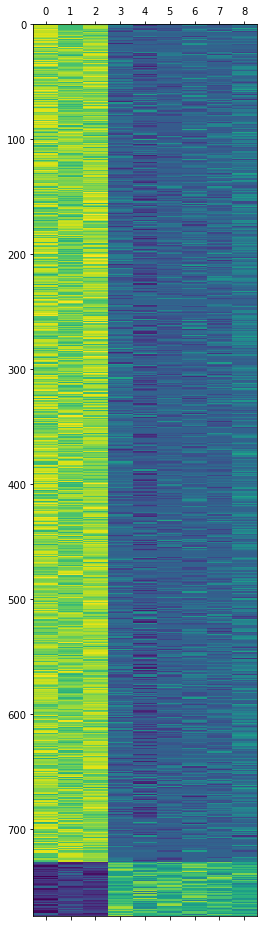

In [110]:
plt.matshow(zscore[set_all],aspect='auto')

In [117]:
diff_genes = df.values[:,0][set_all]
diff_genes.shape # 총 776개의 유전자가 WT,TREAT에 따라 눈에 띄는 변화를 보이고 있다. 

(776,)

In [114]:
df_annot = pd.read_csv('./file_RNAseq/mouse_genes_GRCm38.p5_transcript_version.txt',sep='\t')

In [116]:
df_annot_ix = df_annot.set_index('Transcript stable ID version')

In [125]:
df_annot_sub = df_annot_ix.loc[diff_genes]

In [126]:
df_annot_sub.head()

,Gene stable ID,Transcript stable ID,Gene name,Gene description
Transcript stable ID version,,,,
ENSMUST00000188251.6,ENSMUSG00000023341,ENSMUST00000188251,Mx2,MX dynamin-like GTPase 2 [Source:MGI Symbol;Ac...
ENSMUST00000183291.1,ENSMUSG00000029605,ENSMUST00000183291,Oas1b,2'-5' oligoadenylate synthetase 1B [Source:MGI...
ENSMUST00000103205.10,ENSMUSG00000027395,ENSMUST00000103205,Polr1b,polymerase (RNA) I polypeptide B [Source:MGI S...
ENSMUST00000166505.6,ENSMUSG00000090919,ENSMUST00000166505,Pabpc4l,"poly(A) binding protein, cytoplasmic 4-like [S..."
ENSMUST00000033009.15,ENSMUSG00000030753,ENSMUST00000033009,Thap12,THAP domain containing 12 [Source:MGI Symbol;A...


In [127]:
from collections import Counter
c = Counter(df_annot_sub['Gene name'].values)

In [152]:
c.most_common(10)

[('Gbp3', 5),
 ('Picalm', 4),
 ('Ifi203', 4),
 ('Tg', 4),
 ('Parp9', 3),
 ('Nlrc5', 3),
 ('Slfn8', 3),
 ('Irf7', 3),
 ('Rtp4', 3),
 ('Ifih1', 3)]

In [166]:
genename = 'Creb'
m        = df_annot_sub['Gene name'] == genename
df_annot_sub[m]

,Gene stable ID,Transcript stable ID,Gene name,Gene description
Transcript stable ID version,,,,


In [189]:
i = np.array(['Mapk'.upper() in x.upper() for x in df_annot_sub['Gene name'].values ]).nonzero()[0]
df_annot_sub['Gene name'].values[i]

array(['Mapk1ip1l', 'Mapk14', 'Mapk8ip1'], dtype=object)

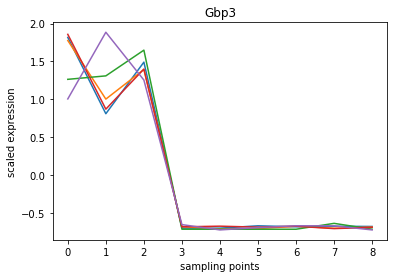

In [139]:
plt.plot(zscore[set_all][m].T)
plt.title(genename)
plt.xlabel('sampling points')
plt.ylabel('scaled expression')
plt.show()

In [164]:
def get_gene_expression_plot(genename):
    m        = df_annot_sub['Gene name'] == genename
    plt.plot(zscore[set_all][m].T)
    plt.title(genename)
    plt.xlabel('sampling points')
    plt.ylabel('scaled expression')
    plt.show()

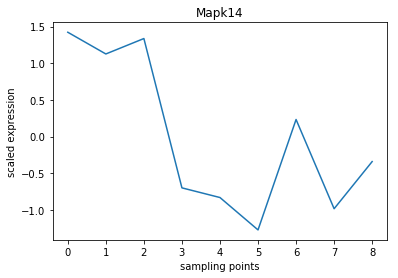

In [183]:
get_gene_expression_plot('Mapk14')

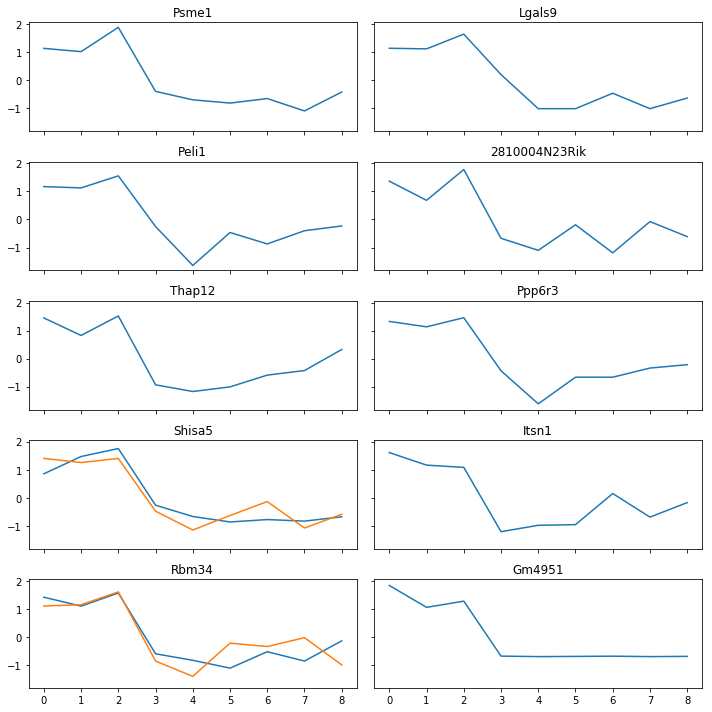

In [163]:
# 시험에 안나옴
import random # 실행할때 마다 달라짐 
fig, axes = plt.subplots(5,2,sharex=True,sharey=True,figsize=(10,10))
genenames = random.sample(df_annot_sub['Gene name'].values,10)
for n,ax in enumerate(np.ravel(axes)):
    genename = genenames[n]
    m        = df_annot_sub['Gene name'] == genename
    ax.set_title(genename)
    ax.plot(zscore[set_all][m].T)
plt.tight_layout()